In [2]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.1 kB/s 
     |████████████████████████████████| 438 kB 49.2 MB/s 
     |████████████████████████████████| 5.8 MB 40.0 MB/s 
     |████████████████████████████████| 1.6 MB 45.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [4]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Divide the datset into independent and dependent features

X=dataset.iloc[:,3:13]

Y=dataset.iloc[:,13]



In [8]:
##Feature Engineering 

geography=pd.get_dummies(X['Geography'],drop_first=True)

gender=pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
##concatinate these variables with dataframe

X=X.drop(['Geography','Gender'],axis=1)

In [23]:
X=pd.concat([X,geography,gender],axis=1)
X.head()
X.shape

(10000, 23)

In [17]:
## Splliting the datset into training and testing 

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [18]:
##Feature scaling 

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train=sc.fit_transform(X_train)

X_test=sc.transform(X_test)


In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
X_train.shape

(8000, 17)

In [27]:
## Part 2 Now lets create a ANN model

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [35]:
## lets initialise ANN model

classifier=Sequential()

classifier.add(Dense(units=17,activation='relu'))

## adding 1st hidden layer

classifier.add(Dense(units=9,activation='relu'))

## adding 2nd hidden layer 

classifier.add(Dense(units=8,activation='relu'))

## adding the outpput layer

classifier.add(Dense(1,activation='sigmoid'))

In [40]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [41]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4399 - accuracy: 0.8099 - val_loss: 0.4111 - val_accuracy: 0.8254
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3862 - accuracy: 0.8444 - val_loss: 0.3708 - val_accuracy: 0.8463
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3631 - accuracy: 0.8522 - val_loss: 0.3721 - val_accuracy: 0.8406
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3548 - accuracy: 0.8561 - val_loss: 0.3698 - val_accuracy: 0.8406
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3507 - accuracy: 0.8558 - val_loss: 0.3713 - val_accuracy: 0.8466
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3475 - accuracy: 0.8569 - val_loss: 0.3680 - val_accuracy: 0.8417
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8572 - val_loss: 0.3648 - val_accuracy: 0.8474

import tensorflow as tf
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

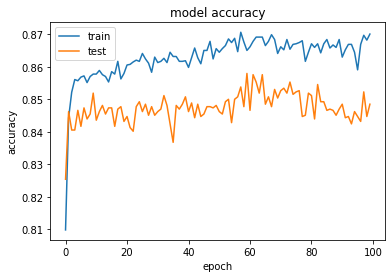

In [44]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

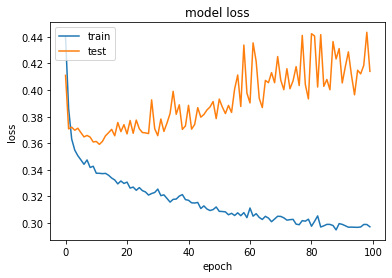

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [47]:
## part 3 making the predictions and evaluating the model

# predicating tne tes set results
Y_pred=classifier.predict(X_test)
Y_pred=(Y_pred >=0.5)

63/63 [==============================] - 0s 2ms/step


In [48]:
## make yhe confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[1486,  109],
       [ 180,  225]])

In [50]:
## calculate the accuracy 

from sklearn.metrics import accuracy_score

score=accuracy_score(Y_pred,Y_test)

score

0.8555

In [52]:
## get the weights 
classifier.get_weights()

[array([[-5.65806806e-01, -1.95722008e+00, -4.11258519e-01,
         -1.20164263e+00,  2.68418312e-01, -1.89738166e+00,
         -1.06731892e+00, -2.87070245e-01, -1.14562653e-01,
         -8.64420593e-01, -1.53905058e+00,  7.07647324e-01,
          7.37439632e-01,  6.38182104e-01, -9.52853560e-01,
          2.52230239e+00, -4.00704801e-01],
        [-2.34143710e+00, -1.27998024e-01, -3.42188644e+00,
         -7.19061184e+00, -3.38490582e+00, -5.62247992e-01,
          2.83879662e+00, -8.17532063e-01, -3.17949206e-01,
          4.70337248e+00,  4.05664301e+00, -1.59929430e+00,
          2.90182424e+00, -4.61179066e+00, -5.38665104e+00,
          2.15798998e+00,  3.09038043e+00],
        [-1.01590240e+00, -3.13839483e+00,  6.71918035e-01,
          1.34054863e+00, -2.19824687e-01,  2.07731557e+00,
          1.76617920e-01,  2.93728709e-01, -1.28939435e-01,
         -3.84021997e-01, -1.29654348e+00,  2.14637804e+00,
         -8.59282732e-01,  6.47987664e-01, -1.40529859e+00,
          3.